# Demonstration of `dead_leaves` usage

## Import

In [2]:
from dead_leaves import LeafGeometryGenerator, LeafAppearanceSampler, ImageRenderer
import torch

%reload_ext autoreload
%autoreload 2

## Shapes and Sizes

### Circles

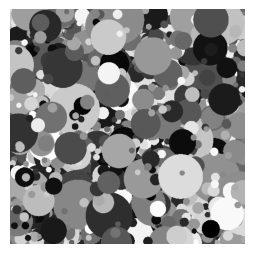

In [ ]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/circles.png")

### Ellipsoids

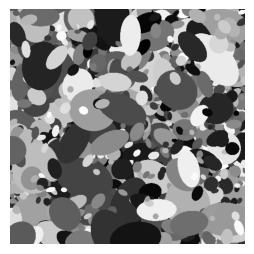

In [5]:
model = LeafGeometryGenerator(
    "ellipsoid", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "orientation": {"uniform": {"low": 0.0, "high": 2 * torch.pi}},
        "aspect_ratio": {"uniform": {"low": 0.5, "high": 2}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/ellipsoids.png")

### Rectangles

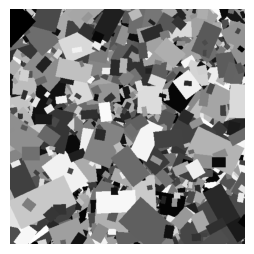

In [6]:
model = LeafGeometryGenerator(
    "rectangular", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "orientation": {"uniform": {"low": 0.0, "high": 2 * torch.pi}},
        "aspect_ratio": {"uniform": {"low": 0.5, "high": 2}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/rectangles.png")

### Regular Polygons

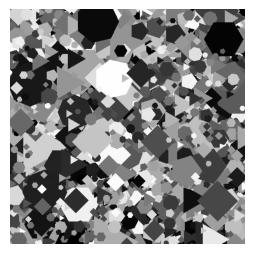

In [40]:
model = LeafGeometryGenerator(
    "polygon", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "n_vertices": {"poisson": {"rate": 5}},
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/polygons.png")

## Colors

### RGB

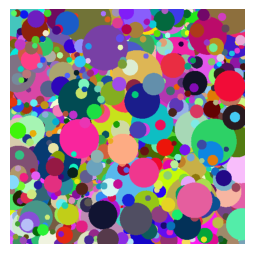

In [9]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "R": {"uniform": {"low": 0.0, "high": 1.0}},
        "G": {"uniform": {"low": 0.0, "high": 1.0}},
        "B": {"uniform": {"low": 0.0, "high": 1.0}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/RGB.png")

### HSV

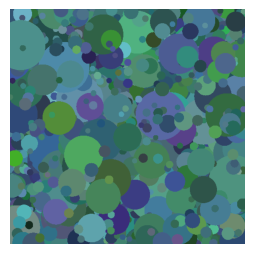

In [ ]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "H": {"normal": {"loc": 0.5, "scale": 0.1}},
        "S": {"normal": {"loc": 0.5, "scale": 0.1}},
        "V": {"normal": {"loc": 0.5, "scale": 0.1}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/HSV.png")

### From Image

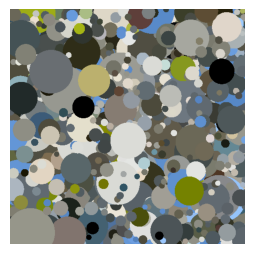

In [12]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"source": {"image": {"dir": "./images"}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/natural_color.png")

## Texture

### Leafwise noise

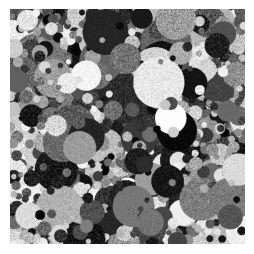

In [13]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})
colormodel.sample_texture({"gray": {"normal": {"loc": 0, "scale": {"uniform": {"low": 0.01, "high": 0.2}}}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/leafwise_texture.png")

### Texture patches

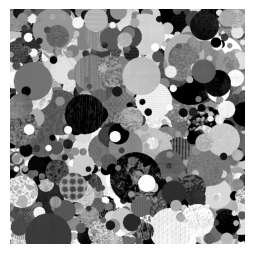

In [14]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.1, "high": 0.9}}})
colormodel.sample_texture(
    {
        "source": {"image": {"dir": "/home/swantje/datasets/brodatz"}},
        "alpha": {"normal": {"loc": 0.0, "scale": 0.5}},
    }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/texture_patch.png")

## Partial sampling

### Sparse sampling

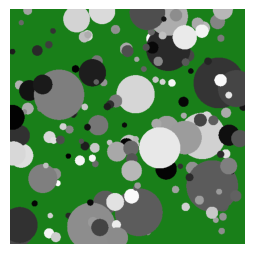

In [18]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512),
    n_sample = 150
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map, background_color=torch.tensor([0.1,0.5,0.1]))
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/sparse_sampling.png")

### Masking

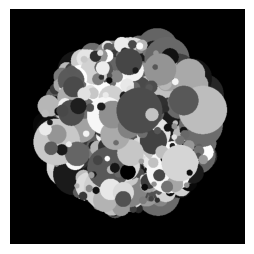

In [24]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512),
    position_mask = {
        "shape": "circular",
        "params": {"area": 512*512*0.4}
    }
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/position_mask.png")

## Dependencies

### Single feature dependency

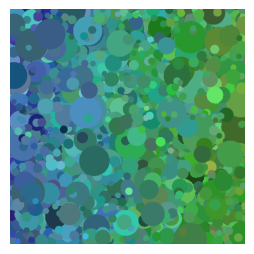

In [25]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 5000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "H": {"normal": {
            "loc": {"from": "x_pos", "fn": lambda x: 1/512*x * 0.3 + (1-1/512*x) * 0.6}, 
            "scale": 0.05
        }},
        "S": {"normal": {"loc": 0.6, "scale": 0.1}},
        "V": {"normal": {"loc": 0.6, "scale": 0.1}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/single_feature_dependency.png")

### Multi-Feature dependency

/home/swantje/dead_leaves/.venv/lib/python3.12/site-packages/torch/utils/_device.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


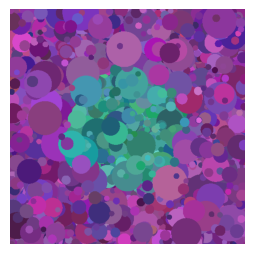

In [28]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 5000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

def fn(d):
    distance_from_center = torch.sqrt(torch.tensor((256 - d["x_pos"]) ** 2 + (256 - d["y_pos"]) ** 2))
    return torch.where(distance_from_center <= 128, 0.5, 0.8)

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "H": {"normal": {
            "loc": {"from": ["x_pos","y_pos"], "fn": fn}, 
            "scale": 0.05
        }},
        "S": {"normal": {"loc": 0.6, "scale": 0.1}},
        "V": {"normal": {"loc": 0.6, "scale": 0.1}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/dual_feature_dependency.png")

## Distributions

### Uniform

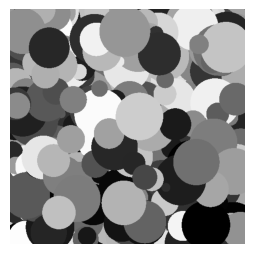

In [29]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"uniform": {"low": 100.0, "high": 10000.0}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/uniform_size.png")

### Constant

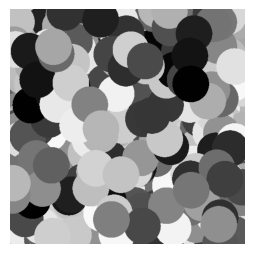

In [31]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"constant": {"value": 5000.0}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/constant_size.png")

### Normal

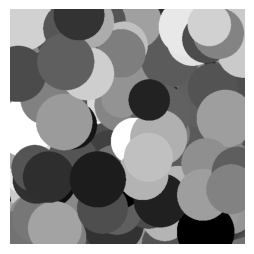

In [37]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"normal": {"loc": 10000.0, "scale": 2000.0}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"normal": {"loc": 0.5, "scale": 0.25}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/normal_size.png")

### Beta

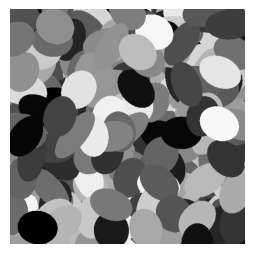

In [39]:
model = LeafGeometryGenerator(
    "ellipsoid", 
    {
        "area": {"constant": {"value": 5000.0}},
        "orientation": {"uniform": {"low": 0.0, "high": 2*torch.pi}},
        "aspect_ratio": {"beta": {"concentration0": 5, "concentration1": 13}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table,segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### Poisson

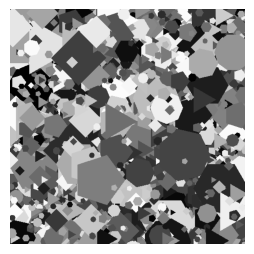

In [41]:
model = LeafGeometryGenerator(
    "polygon", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "n_vertices": {"poisson": {"rate": 5}},
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### Powerlaw

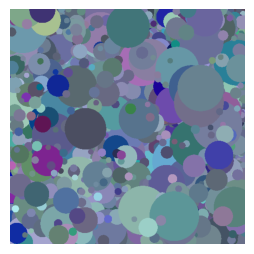

In [42]:
model = LeafGeometryGenerator(
    "circular", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "H": {"normal": {"loc": 0.6, "scale": 0.1}},
        "S": {"powerlaw": {"low": 0.2, "high": 1.0, "k": 3}},
        "V": {"normal": {"loc": 0.6, "scale": 0.1}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### Cosine

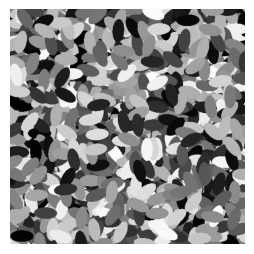

In [43]:
model = LeafGeometryGenerator(
    "ellipsoid", 
    {
        "area": {"constant": {"value": 1000.0}},
        "orientation": {"cosine": {"amplitude": 0.5, "frequency": 4}},
        "aspect_ratio": {"constant": {"value": 0.5}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### ExpCosine

/home/swantje/dead_leaves/.venv/lib/python3.12/site-packages/torchquad/integration/utils.py:262: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object will be returned.
  warnings.warn(


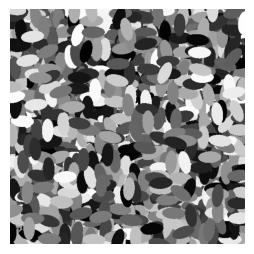

In [44]:
model = LeafGeometryGenerator(
    "ellipsoid", 
    {
        "area": {"constant": {"value": 1000.0}},
        "orientation": {"expcosine": {"frequency": 4, "exponential_constant": 3}},
        "aspect_ratio": {"constant": {"value": 0.5}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### Image

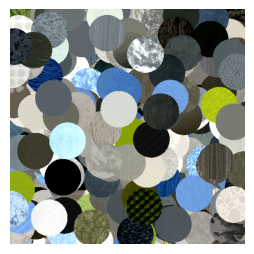

In [46]:
model = LeafGeometryGenerator(
    "circular", 
    {
        "area": {"constant": {"value": 5000.0}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({
        "source": {"image": {"dir": "./images"}}
    })
colormodel.sample_texture({
        "source": {"image": {"dir": "./textures/brodatz"}},
        "alpha": {"normal": {"loc": 0.0, "scale": 0.4}},
    })

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

## Logo

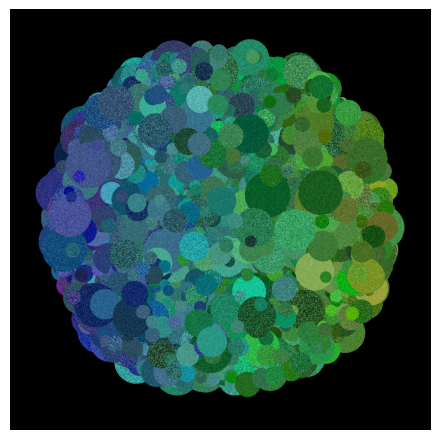

In [48]:
model = LeafGeometryGenerator(
    "circular",
    {"area": {"powerlaw": {"low": 500.0, "high": 10000.0, "k": 1.5}}},
    (1000,1000),
    {
        "shape": "circular",
        "params": {'x_pos': 500, 'y_pos': 500,  'area': torch.tensor([500000])}
        }
)

leaf_table, segmentation_map = model.generate_segmentation()

color_params = {
    'H': {'normal': {
        'loc': {'from': 'x_pos', 'fn': lambda x: 0.001*x * 0.2 + (1-0.001*x) * 0.7}, 
        'scale': 0.05
        }},
    'S': {'powerlaw': {'low': 0.5, 'high': 1.0, "k": 3}},
    'V': {'normal': {'loc': 0.5, 'scale': 0.1}}
}

texture_params = {
    'gray': {'normal': {'loc': 0.0, 'scale': {'powerlaw': {'low': 0.05, 'high': 0.2, 'k': 3}}}},
}

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(color_params)
colormodel.sample_texture(texture_params)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image)
renderer.save(image, '../docs/_static/logo_dead_leaves.png')